In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data=pd.read_pickle('cleaned_df_3.pkl')
data.head()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list
0,196,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,132.5,NaN,Show what you know A,Assessment_A,5,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,"[no, because, you, don't, change, the, denomin...",[],[]
1,197,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,581,NaN,Show what you know A,Assessment_A,6,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,"[i, do, not, know, the, answer]",[],[]
2,723,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,15.75,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,1a,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,"[first, you, need, to, double, the, denominato...",[],[]
3,758,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,0.333,NaN,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,2a,...,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,"[first, multiply, the, denominator, by, two, t...",[],[]
4,801,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,11,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,3a,...,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,"[first, multiply, 8, by, 2, then, do, the, sam...","[8, 2]",[]


In [3]:
import codecs
from sklearn import feature_extraction 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
data['Level (ProblemSet)'].value_counts()

Erroneous_LCD_Collaboration                           1318
Erroneous_Comparing_Collaboration                     1192
Assessment_A                                           846
Assessment_B                                           835
Erroneous_LCD_Individual                               819
Erroneous_Comparing_Individual                         732
Erroneous_Equivalent_Collaboration                     724
Erroneous_Equivalent_Individual                        498
Erroneous_EquivalentLCD_Collaboration                  158
Erroneous_ComparingAddingSubtracting_Collaboration     102
Erroneous_NamingMaking_Collaboration                    76
Erroneous_NamingMaking_Individual                       13
Erroneous_ComparingAddingSubtracting_Individual         12
Erroneous_EquivalentLCD_Individual                       4
Name: Level (ProblemSet), dtype: int64

In [5]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [6]:
data['problem']=0
for i in range(len(data)):
    data['problem'][i]=int(data['Problem Name'][i][0])
data['problem'].value_counts()

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [7]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [8]:
word_tokenize(data.Input[0])

['no',
 ',',
 'because',
 'you',
 'do',
 "n't",
 'change',
 'the',
 'denominater',
 'so',
 'this',
 'why',
 'this',
 'answer',
 'is',
 'wrong',
 '.']

In [9]:
data.word_list[0]

['no',
 'because',
 'you',
 "don't",
 'change',
 'the',
 'denominator',
 'so',
 'the',
 'why',
 'the',
 'answer',
 'be',
 'wrong']

In [10]:
data['new_answer']=''
all_answer=[]
for i in range(len(data)):
    for temp_word in data.word_list[i]:
        data.new_answer[i]=data.new_answer[i]+temp_word+' '
    all_answer=all_answer+[data.new_answer[i]]

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
data.new_answer[0]

"no because you don't change the denominator so the why the answer be wrong "

In [12]:
all_answer[:10]

["no because you don't change the denominator so the why the answer be wrong ",
 'i do not know the answer ',
 'first you need to double the denominator then do the same to the numerator ',
 'first multiply the denominator by two then do the same to the numerator ',
 'first multiply 8 by 2 then do the same to the numerator ',
 'first must the denominator by 2 then do the same for the numerator ',
 'first multiply the denominator by 2 and do the same to the numerator ',
 'he need to find the least common denominator so they will both be equal he also need to find they multiply and factor ',
 'next time olivia times to find the least common denominator she need to look at her number more careful she had the 1 and the 7 mixed up ',
 'next time kaitie need to compare 12 and 8 with the factor and multiply of 8 and 12 and find there similar ']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_answer)

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(7329, 664)


In [14]:
tfidf

<7329x664 sparse matrix of type '<class 'numpy.float64'>'
	with 65606 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.cluster import KMeans

num_clusters = 5.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
idea={'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging to each cluster.

TypeError: 'float' object cannot be interpreted as an integer

In [16]:
data['Student Response Subtype']=data['Student Response Subtype'].fillna('individual')
data['Student Response Subtype'].value_counts()

individual    5515
Student1       959
Student2       853
Student3         2
Name: Student Response Subtype, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,2))
tfidf_vectorizer=TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(all_answer)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [18]:
len(tfidf_feature_names)
tfidf_feature_names

['10',
 '100',
 '12',
 '13',
 '14',
 '15',
 '16',
 '18',
 '20',
 '21',
 '24',
 '27',
 '28',
 '2jamal',
 '30',
 '32',
 '36',
 '40',
 '42',
 '45',
 '60',
 '65',
 '65ths',
 '72',
 '96',
 'able',
 'about',
 'above',
 'accurate',
 'across',
 'act',
 'actual',
 'add',
 'adjust',
 'advice',
 'after',
 'again',
 'agree',
 'alex',
 'alexander',
 'alike',
 'alison',
 'all',
 'almost',
 'alone',
 'already',
 'also',
 'always',
 'amount',
 'an',
 'and',
 'angelo',
 'anne',
 'another',
 'answer',
 'any',
 'anything',
 'apart',
 'area',
 'argument',
 'around',
 'arrow',
 'as',
 'ask',
 'at',
 'attend',
 'attention',
 'away',
 'baby',
 'back',
 'backwords',
 'bar',
 'basic',
 'be',
 'because',
 'become',
 'been',
 'before',
 'believe',
 'below',
 'besides',
 'best',
 'better',
 'between',
 'big',
 'bigger',
 'bit',
 'blank',
 'bo',
 'boss',
 'both',
 'bottom',
 'brad',
 'brain',
 'break',
 'but',
 'by',
 'cake',
 'calculate',
 'call',
 'can',
 'candy',
 'cannot',
 'care',
 'careful',
 'case',
 'cause

In [19]:
tfidf_vectorizer.get_values()

AttributeError: 'TfidfVectorizer' object has no attribute 'get_values'

In [20]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]
'''

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=8).fit(tfidf)\nkm_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))\ndata['km_cluster']=0\nfor i in range(len(data)):\n    data['km_cluster'][i]=km_predict[i]\n"

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
km_predict

array([7, 9, 9, ..., 7, 1, 6])

In [22]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['km_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
LCD Erroneous Collaboration                                   0.468339
LCD Erroneous Individual                                      0.182796
Comparing Erroneous Collaboration                             0.155317
Comparing Erroneous Individual                                0.076464
LCD Erroneous Group                                           0.025090
Show what you learned B                                       0.022700
Show what you know B                                          0.014337
Equivalent Erroneous Collaboration                            0.014337
Show what you know A                                          0.011947
Comparing Erroneous Group                                     0.010753
Show what you learned A                                       0.008363
Equivalent Erroneous Individual                               0.003584
Comparing, Adding, and Subtracting Erroneous Individual       0.002389
Comparing, Adding, and Subtracting Erroneous Collaborat

In [24]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['problem'].value_counts()/len(data[data['km_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

For K-means cluster 0
3    0.199522
1    0.191159
5    0.143369
2    0.130227
4    0.120669
6    0.091995
7    0.070490
8    0.052569
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 1
5    0.478516
3    0.167969
2    0.167969
4    0.070312
7    0.039062
1    0.037109
6    0.021484
8    0.017578
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 2
1    0.286738
2    0.204301
3    0.132616
6    0.100358
5    0.082437
4    0.078853
7    0.060932
8    0.053763
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 3
5    0.402410
4    0.212048
2    0.122892
7    0.118072
1    0.055422
3    0.036145
6    0.031325
8    0.021687
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 4
2    0.186207
3    0.179310
1    0.172414
5    0.131034
4    0.106897
6    0.096552
7    0.075862
8    0.051724
Name: problem, dtype: float64
------------

In [25]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['km_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
Erroneous_LCD_Collaboration                           0.468339
Erroneous_LCD_Individual                              0.207885
Erroneous_Comparing_Collaboration                     0.155317
Erroneous_Comparing_Individual                        0.087216
Assessment_B                                          0.037037
Assessment_A                                          0.020311
Erroneous_Equivalent_Collaboration                    0.014337
Erroneous_Equivalent_Individual                       0.003584
Erroneous_ComparingAddingSubtracting_Individual       0.002389
Erroneous_ComparingAddingSubtracting_Collaboration    0.002389
Erroneous_EquivalentLCD_Individual                    0.001195
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For K-means cluster 1
Assessment_B                                          0.248047
Assessment_A                                          0.228516
Erroneous_LCD_Collaboration                           

In [26]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['km_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
individual    0.655914
Student2      0.185185
Student1      0.158901
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 1
individual    0.789062
Student2      0.113281
Student1      0.097656
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 2
individual    0.709677
Student1      0.182796
Student2      0.107527
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 3
individual    0.780723
Student1      0.118072
Student2      0.101205
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 4
individual    0.575862
Student1      0.272414
Student2      0.151724
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 5
individual    0.700240
Student2      0.153477
Student1      0.146283
Name: Stu

In [27]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=10, gamma=0.1).fit_predict(tfidf)
sp_cluster

array([7, 1, 7, ..., 7, 6, 4])

In [28]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['sp_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
LCD Erroneous Individual                                      0.179210
Comparing Erroneous Collaboration                             0.173095
LCD Erroneous Collaboration                                   0.171214
Comparing Erroneous Individual                                0.139229
Equivalent Erroneous Collaboration                            0.075259
Equivalent Erroneous Individual                               0.074788
Show what you learned A                                       0.032455
Show what you learned B                                       0.030574
Show what you know B                                          0.029633
Show what you know A                                          0.028222
Naming and Making Erroneous Collaboration                     0.021637
Equivalent and LCD Erroneous Collaboration                    0.020696
Comparing, Adding, and Subtracting Erroneous Collaboration    0.017874
Naming and Making Erroneous Individual                

In [29]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['problem'].value_counts()/len(data[data['sp_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
5    0.186736
1    0.157573
2    0.145343
3    0.129351
6    0.118532
4    0.117592
7    0.077140
8    0.067733
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 1
5    0.301008
1    0.173804
2    0.162469
3    0.120907
4    0.114610
6    0.066751
7    0.041562
8    0.018892
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 2
2    0.191882
1    0.191882
3    0.180812
5    0.125461
4    0.110701
6    0.092251
7    0.062731
8    0.044280
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 3
3    0.219753
5    0.204938
1    0.143210
4    0.116049
2    0.103704
6    0.101235
7    0.056790
8    0.054321
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 4
6    0.871069
5    0.034591
1    0.033019
2    0.022013
3    0.018868
7    0.011006
8    0.007862
4    0.001572
Name: problem, dtype: float64
-------

In [30]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['sp_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
Erroneous_LCD_Individual                              0.180621
Erroneous_Comparing_Collaboration                     0.173095
Erroneous_LCD_Collaboration                           0.171214
Erroneous_Comparing_Individual                        0.139229
Erroneous_Equivalent_Collaboration                    0.075259
Erroneous_Equivalent_Individual                       0.074788
Assessment_A                                          0.060677
Assessment_B                                          0.060207
Erroneous_NamingMaking_Collaboration                  0.021637
Erroneous_EquivalentLCD_Collaboration                 0.020696
Erroneous_ComparingAddingSubtracting_Collaboration    0.017874
Erroneous_NamingMaking_Individual                     0.003763
Erroneous_ComparingAddingSubtracting_Individual       0.000941
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For Spectral Cluster 1
Erroneous_LCD_Collaboration                         

In [31]:
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['sp_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For Spectral Cluster 0
individual    0.759172
Student1      0.142521
Student2      0.097366
Student3      0.000941
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 1
individual    0.730479
Student2      0.146096
Student1      0.123426
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 2
individual    0.575646
Student1      0.284133
Student2      0.140221
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 3
individual    0.649383
Student1      0.177778
Student2      0.172840
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 4
individual    0.973270
Student1      0.017296
Student2      0.009434
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 5
individual    0.637908
Student2      0.188235
Stu

In [32]:
from sklearn import mixture
gmm=mixture.GaussianMixture(n_components=5)
gmm.fit(tfidf)
gmm_cluster=gmm.predict(tfidf)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [33]:
from sklearn.cluster import AgglomerativeClustering
ac_cluster = AgglomerativeClustering().fit(tfidf)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [32]:
data['km_cluster'].value_counts()

9    2698
7     983
0     837
5     834
1     512
3     415
4     290
2     279
8     254
6     227
Name: km_cluster, dtype: int64

In [33]:
data['sp_cluster'].value_counts()

0    2126
7     854
1     794
5     765
4     636
6     559
8     496
9     423
3     405
2     271
Name: sp_cluster, dtype: int64

In [34]:
data['problem'].value_counts()

5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [35]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [36]:
from scipy import stats
from scipy.stats import ttest_ind

In [37]:
ttest_ind(data['km_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.621931800375984, pvalue=0.5427481922265986)

In [38]:
ttest_ind(data['km_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=1.6347626991112418, pvalue=0.11370603986277344)

In [39]:
ttest_ind(data['sp_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.8073878500445625, pvalue=0.43128286799815074)

In [40]:
ttest_ind(data['sp_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=1.9746071514271724, pvalue=0.05862154387664638)

In [42]:
sklearn.metrics.homogeneity_completeness_v_measure(np.array([1,1,2,2,3]), np.array([1,1,1,1,1]), beta=1.0)

(-2.1048474724766827e-16, 1.0, -4.2096949449533665e-16)

In [43]:
#sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

In [44]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

(0.1008931703004868, 0.09959834854659996, 0.10024157829063568)

In [45]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['Level (Assignment)'], beta=1.0)

(0.17100937092144713, 0.1400244720348803, 0.15397357823633911)

In [46]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['problem'], beta=1.0)

(0.09783015890389002, 0.1047676089595132, 0.10118010618360047)

In [47]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['Level (Assignment)'], beta=1.0)

(0.14818452611002697, 0.13162876147881053, 0.13941686479770612)

In [48]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(tfidf_vectorizer.transform(all_answer))
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(tfidf)

In [50]:
iso_predict

array([[ 4.41649343e-02, -6.67297160e-01, -6.66918599e-01],
       [ 6.08944758e-01,  8.62591463e-01,  6.22405649e-01],
       [-1.35175546e-03, -1.11380920e+00,  2.96152777e-01],
       ...,
       [-1.09202653e+00,  2.07916974e+00, -1.78631788e+00],
       [-4.37863076e-01, -6.34564394e-01,  3.53674716e-01],
       [-2.56078447e+00,  1.06804542e+00, -1.31449845e+00]])

In [51]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(tfidf)
svd_predict

array([[ 0.37551661, -0.18054496, -0.01923655],
       [ 0.23116955, -0.03744982, -0.00631935],
       [ 0.55026372,  0.09413829,  0.12294134],
       ...,
       [ 0.32597276, -0.203954  ,  0.01641633],
       [ 0.21121946, -0.14038469, -0.09398313],
       [ 0.30195481, -0.47763981, -0.25537787]])

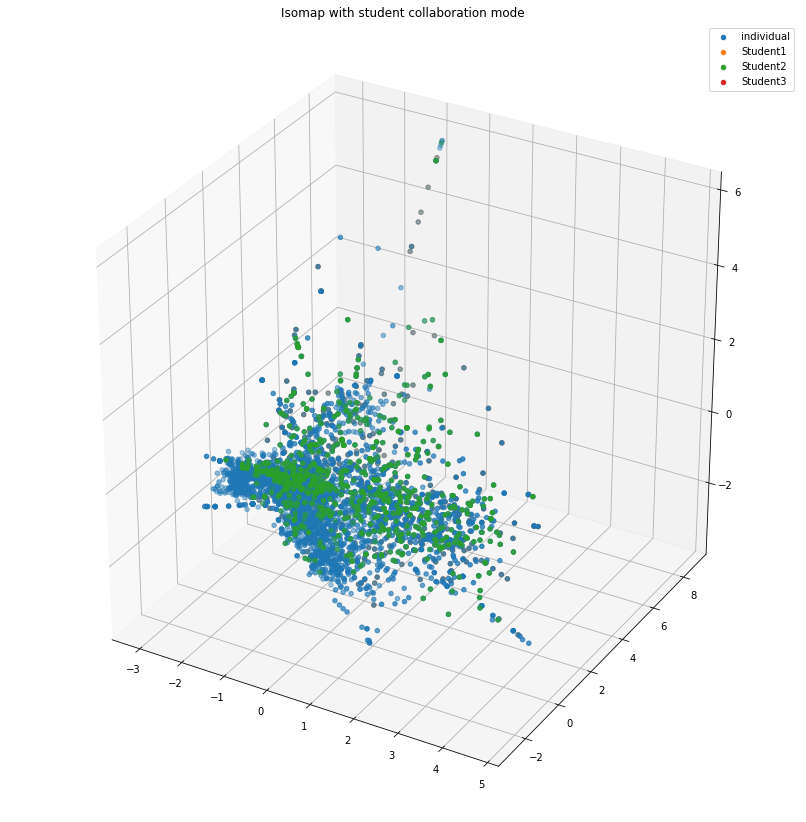

In [52]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with student collaboration mode')
plt.show()

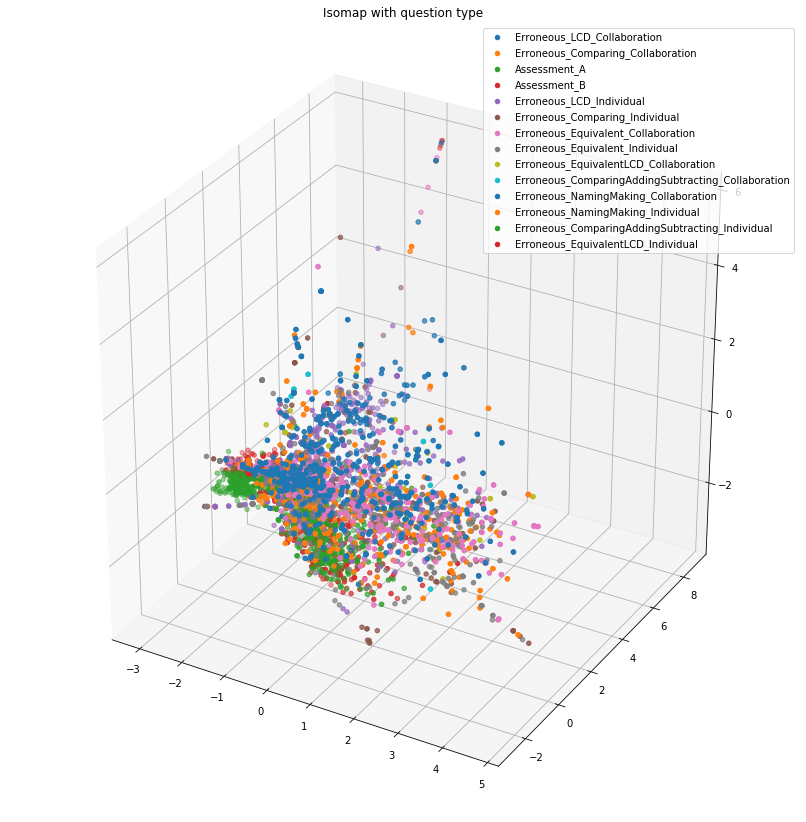

In [53]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with question type')
plt.show()

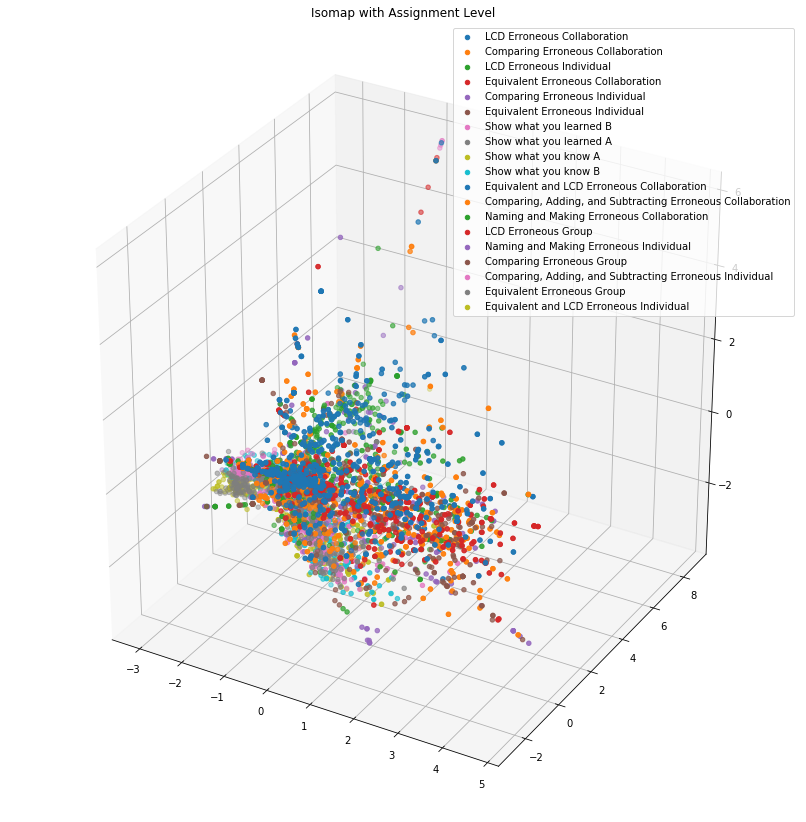

In [54]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Assignment Level')
plt.show()

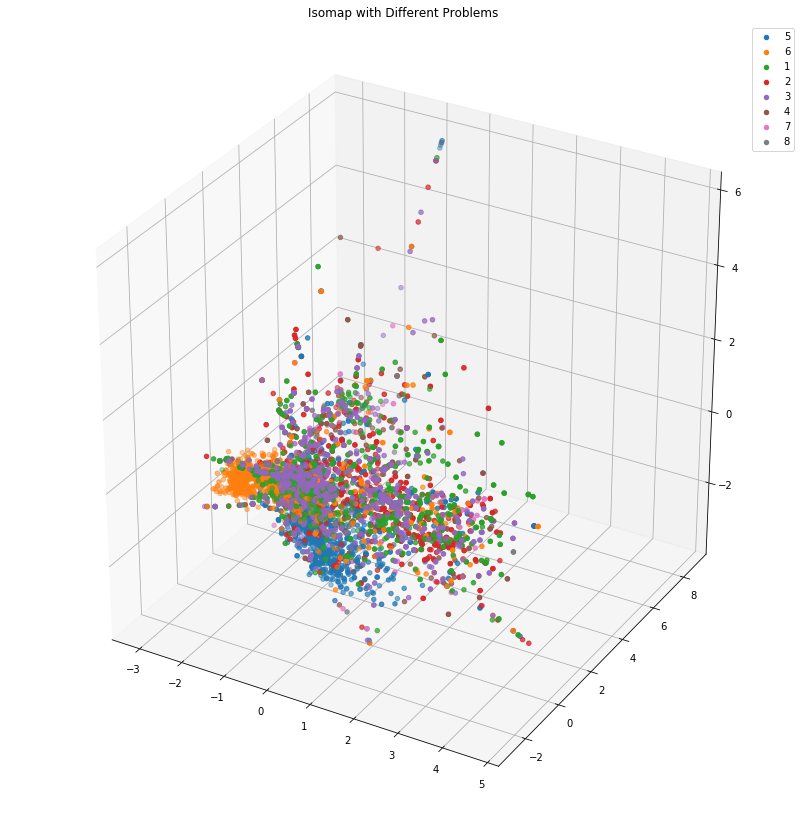

In [55]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Different Problems')
plt.show()

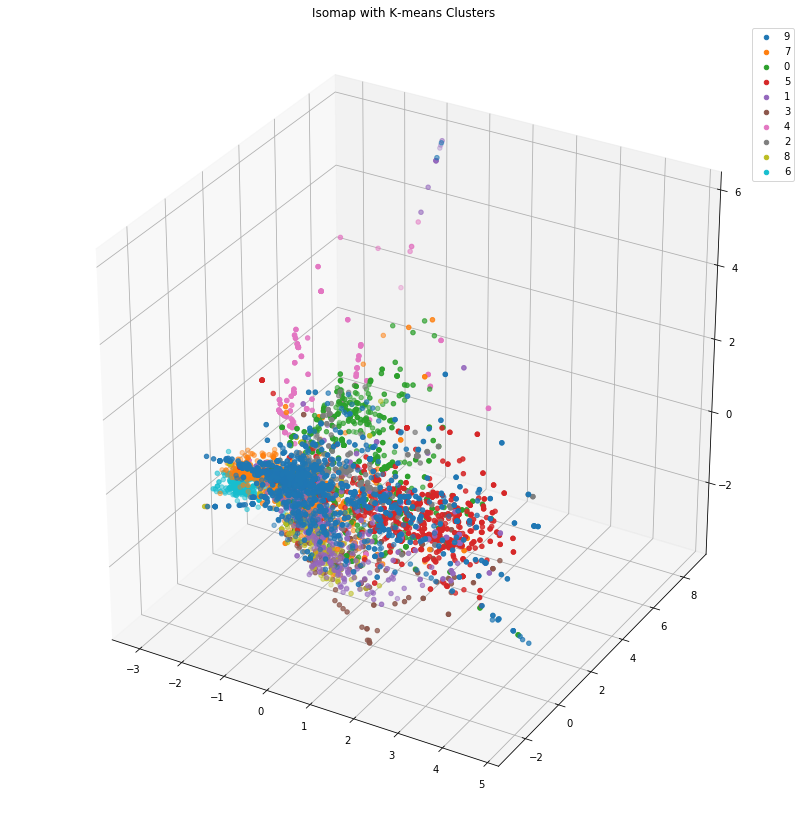

In [56]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

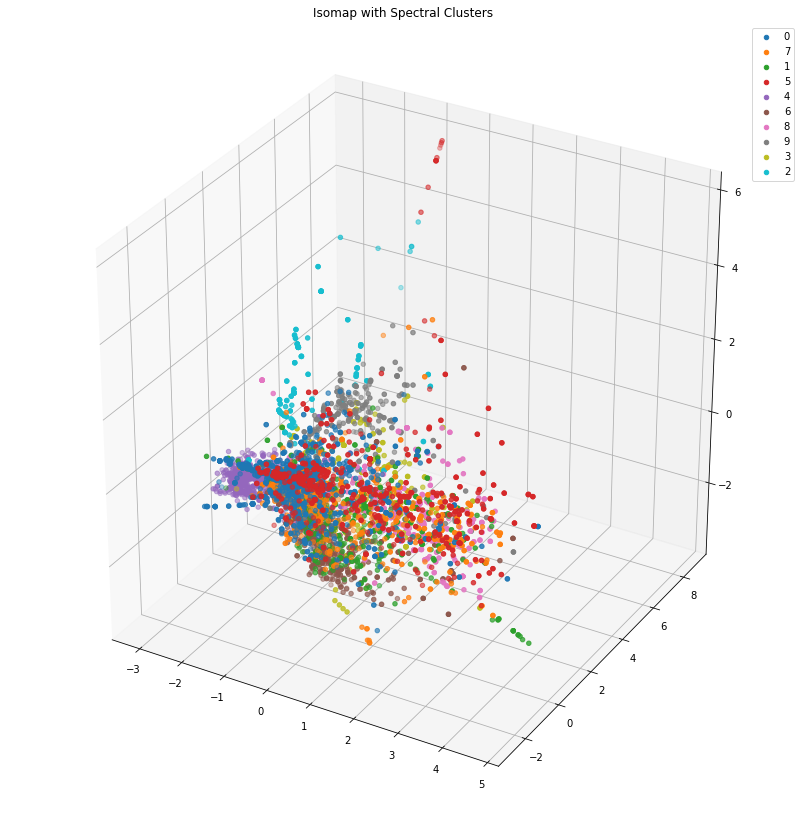

In [57]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

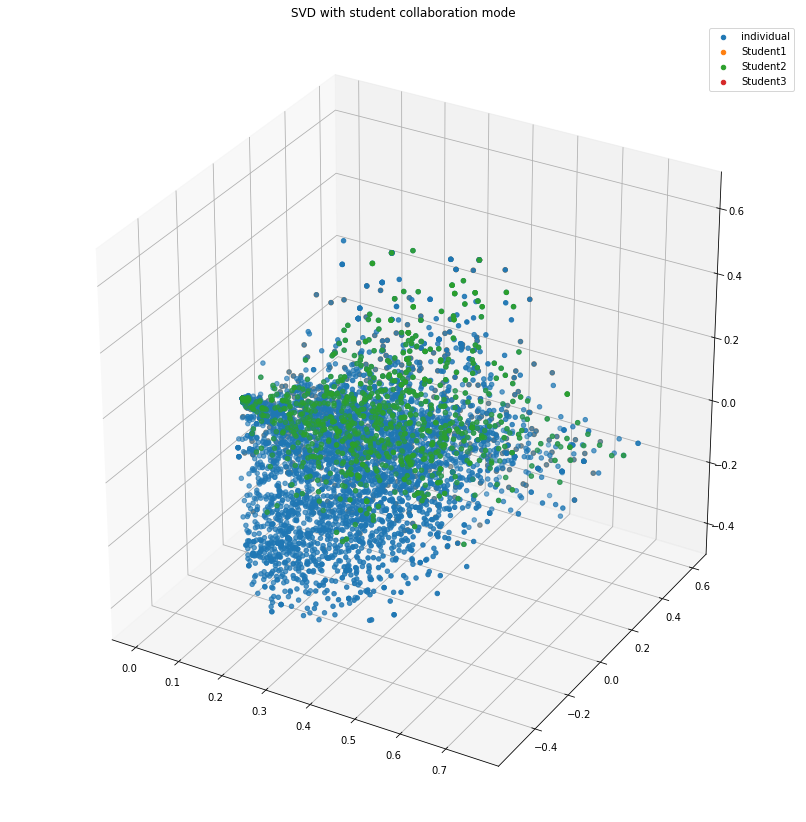

In [58]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with student collaboration mode')
plt.show()

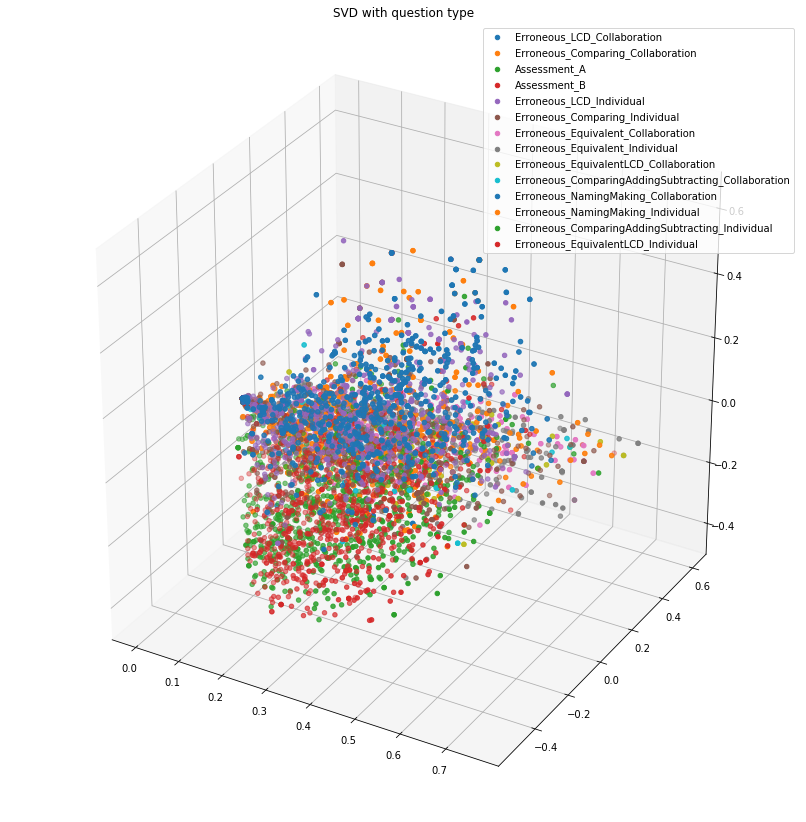

In [59]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with question type')
plt.show()

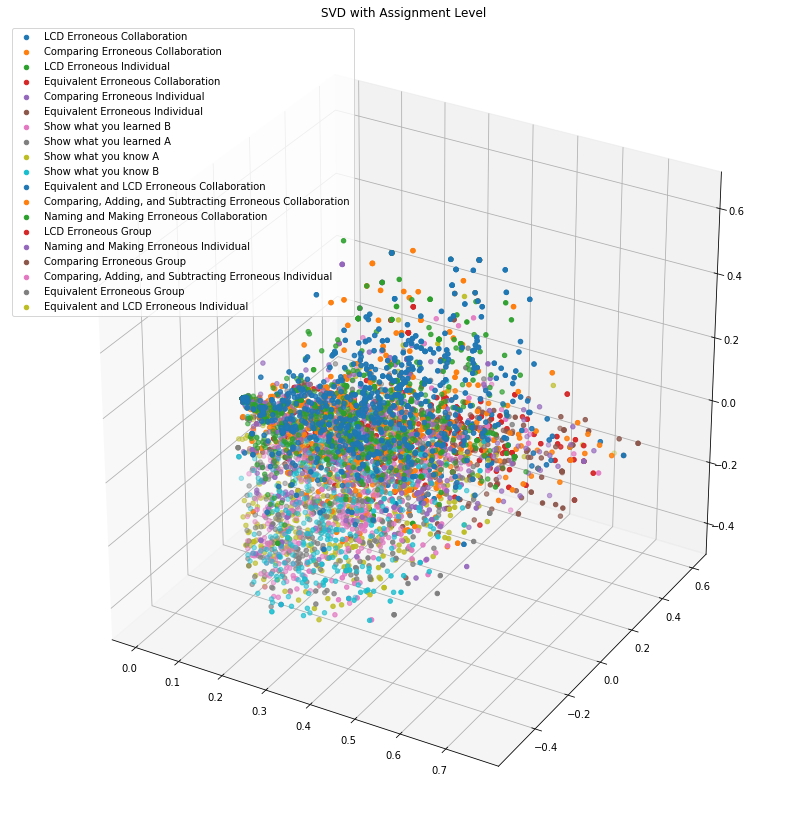

In [60]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Assignment Level')
plt.show()

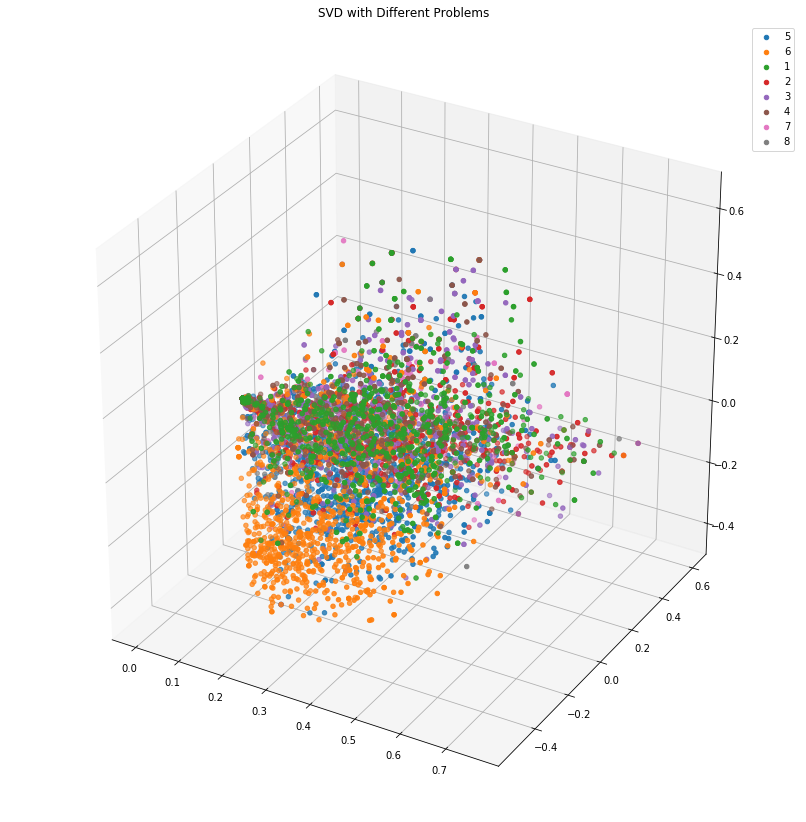

In [61]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Different Problems')
plt.show()

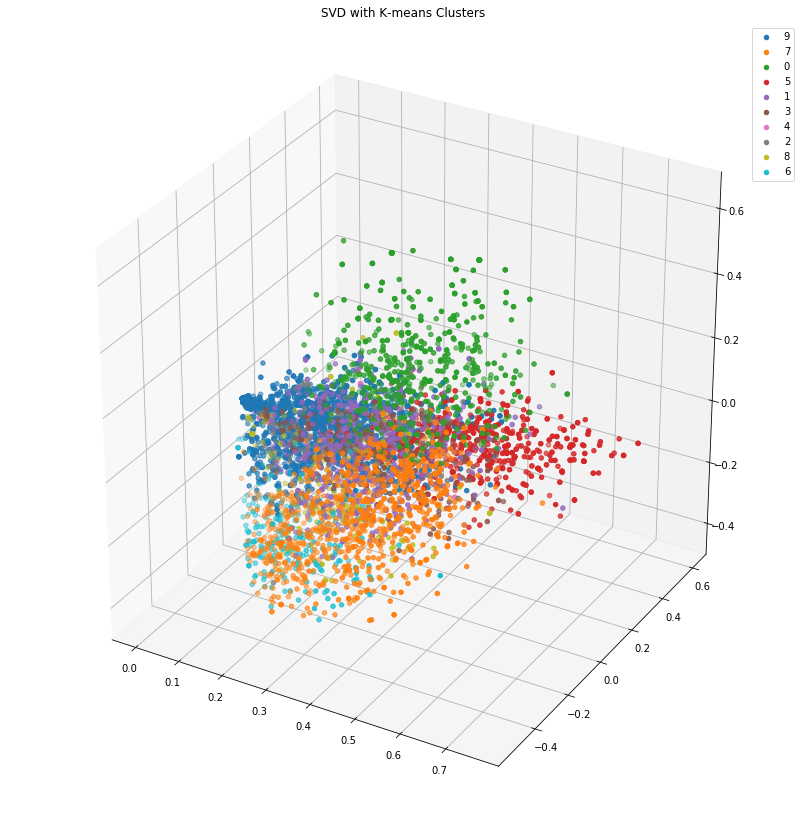

In [62]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

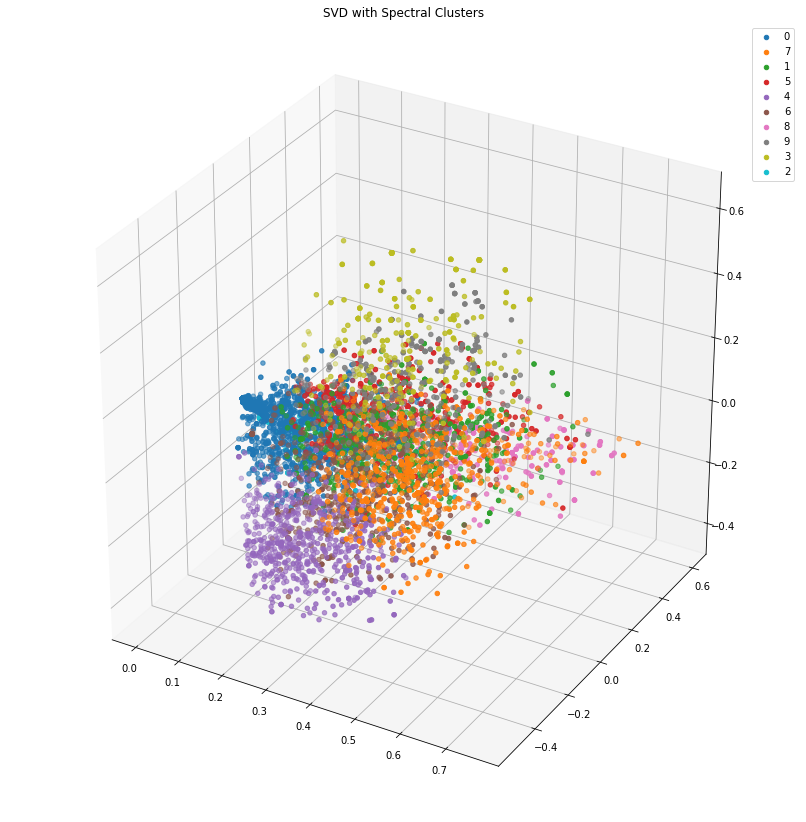

In [63]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()

In [64]:
#tf_vectorizer = CountVectorizer(max_df=0.90, min_df=10, max_features=1000, stop_words='english', ngram_range=(1,2))
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(all_answer)
tf_feature_names = tf_vectorizer.get_feature_names()

In [65]:
kmeans = KMeans(n_clusters=10).fit(tf)
kmeans.predict(tfidf_vectorizer.transform(all_answer))

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
nmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.6, init='nndsvd').fit(tfidf)

NameError: name 'NMF' is not defined

In [45]:
lda = LatentDirichletAllocation(n_topics=10, max_iter=500, learning_method='online', learning_offset=10.,random_state=0).fit(tf)

TypeError: __init__() got an unexpected keyword argument 'n_topics'

In [ ]:
cluster_data=data[]